In [1]:
!pip install tifffile 
!pip install imagecodecs 


# Mounting Drive 

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [3]:
import numpy as np
import tensorflow as tf
import plotly.express as px
from plotly.subplots import make_subplots
import sklearn
import pandas as pd
import keras
import cv2
import os
from tqdm import tqdm
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import datetime
import plotly.graph_objects as go
import random


# Preparing Data

In [4]:
seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

GLOBAL_PATH = '/content/drive/MyDrive/Unet_Paludism/'

IMAGES = '/content/drive/MyDrive/Unet_Paludism/img/'
MASKS = '/content/drive/MyDrive/Unet_Paludism/masks/'

train_ids = sorted(os.listdir(IMAGES))
mask_ids = sorted(os.listdir(MASKS))


In [5]:
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8) # Empty arrays to fill while reading images and masks
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

print(f'Shape of X_train : {X_train.shape} \nShape of Y_train : {Y_train.shape}')

Shape of X_train : (210, 128, 128, 3) 
Shape of Y_train : (210, 128, 128, 1)


In [6]:
print('Resizing training images and masks \n')


for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)): 

  path = GLOBAL_PATH # + id_
  img = skimage.io.imread(path + 'img/' + id_)[:,:,:IMG_CHANNELS]  
  img = skimage.transform.resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
  X_train[n] = img  #Fill empty X_train with values from img


 

  0%|          | 0/210 [00:00<?, ?it/s]

Resizing training images and masks 



100%|██████████| 210/210 [04:58<00:00,  1.42s/it]


  0%|          | 1/210 [00:00<01:21,  2.57it/s]

type of mask : float64


  1%|          | 2/210 [00:00<01:23,  2.50it/s]

type of mask : float64


  1%|▏         | 3/210 [00:01<01:24,  2.45it/s]

type of mask : float64


  2%|▏         | 4/210 [00:01<01:25,  2.42it/s]

type of mask : float64


  2%|▏         | 5/210 [00:02<01:25,  2.41it/s]

type of mask : float64


  3%|▎         | 6/210 [00:02<01:25,  2.40it/s]

type of mask : float64


  3%|▎         | 7/210 [00:02<01:24,  2.39it/s]

type of mask : float64


  4%|▍         | 8/210 [00:03<01:24,  2.38it/s]

type of mask : float64


  4%|▍         | 9/210 [00:03<01:24,  2.38it/s]

type of mask : float64


  5%|▍         | 10/210 [00:04<01:23,  2.38it/s]

type of mask : float64


  5%|▌         | 11/210 [00:04<01:24,  2.35it/s]

type of mask : float64


  6%|▌         | 12/210 [00:05<01:25,  2.32it/s]

type of mask : float64


  6%|▌         | 13/210 [00:05<01:25,  2.29it/s]

type of mask : float64


  7%|▋         | 14/210 [00:05<01:26,  2.28it/s]

type of mask : float64


  7%|▋         | 15/210 [00:06<01:24,  2.30it/s]

type of mask : float64


  8%|▊         | 16/210 [00:06<01:23,  2.33it/s]

type of mask : float64


  8%|▊         | 17/210 [00:07<01:22,  2.33it/s]

type of mask : float64


  9%|▊         | 18/210 [00:07<01:22,  2.31it/s]

type of mask : float64


  9%|▉         | 19/210 [00:08<01:22,  2.31it/s]

type of mask : float64


 10%|▉         | 20/210 [00:08<01:22,  2.32it/s]

type of mask : float64


 10%|█         | 21/210 [00:08<01:21,  2.31it/s]

type of mask : float64


 10%|█         | 22/210 [00:09<01:21,  2.32it/s]

type of mask : float64


 11%|█         | 23/210 [00:09<01:20,  2.34it/s]

type of mask : float64


 11%|█▏        | 24/210 [00:10<01:19,  2.33it/s]

type of mask : float64


 12%|█▏        | 25/210 [00:10<01:19,  2.32it/s]

type of mask : float64


 12%|█▏        | 26/210 [00:11<01:19,  2.33it/s]

type of mask : float64


 13%|█▎        | 27/210 [00:11<01:19,  2.31it/s]

type of mask : float64


 13%|█▎        | 28/210 [00:11<01:18,  2.32it/s]

type of mask : float64


 14%|█▍        | 29/210 [00:12<01:18,  2.32it/s]

type of mask : float64


 14%|█▍        | 30/210 [00:12<01:17,  2.32it/s]

type of mask : float64


 15%|█▍        | 31/210 [00:13<01:17,  2.32it/s]

type of mask : float64


 15%|█▌        | 32/210 [00:13<01:16,  2.34it/s]

type of mask : float64


 16%|█▌        | 33/210 [00:14<01:15,  2.33it/s]

type of mask : float64


 16%|█▌        | 34/210 [00:14<01:15,  2.34it/s]

type of mask : float64


 17%|█▋        | 35/210 [00:14<01:15,  2.32it/s]

type of mask : float64


 17%|█▋        | 36/210 [00:15<01:14,  2.33it/s]

type of mask : float64


 18%|█▊        | 37/210 [00:15<01:14,  2.31it/s]

type of mask : float64


 18%|█▊        | 38/210 [00:16<01:14,  2.32it/s]

type of mask : float64


 19%|█▊        | 39/210 [00:16<01:13,  2.33it/s]

type of mask : float64


 19%|█▉        | 40/210 [00:17<01:14,  2.29it/s]

type of mask : float64


 20%|█▉        | 41/210 [00:17<01:13,  2.31it/s]

type of mask : float64


 20%|██        | 42/210 [00:18<01:12,  2.32it/s]

type of mask : float64


 20%|██        | 43/210 [00:18<01:11,  2.32it/s]

type of mask : float64


 21%|██        | 44/210 [00:18<01:11,  2.33it/s]

type of mask : float64


 21%|██▏       | 45/210 [00:19<01:10,  2.33it/s]

type of mask : float64


 22%|██▏       | 46/210 [00:19<01:10,  2.34it/s]

type of mask : float64


 22%|██▏       | 47/210 [00:20<01:10,  2.31it/s]

type of mask : float64


 23%|██▎       | 48/210 [00:20<01:09,  2.32it/s]

type of mask : float64


 23%|██▎       | 49/210 [00:21<01:08,  2.33it/s]

type of mask : float64


 24%|██▍       | 50/210 [00:21<01:08,  2.34it/s]

type of mask : float64


 24%|██▍       | 51/210 [00:21<01:08,  2.32it/s]

type of mask : float64


 25%|██▍       | 52/210 [00:22<01:07,  2.33it/s]

type of mask : float64


 25%|██▌       | 53/210 [00:22<01:07,  2.33it/s]

type of mask : float64


 26%|██▌       | 54/210 [00:23<01:07,  2.33it/s]

type of mask : float64


 26%|██▌       | 55/210 [00:23<01:07,  2.31it/s]

type of mask : float64


 27%|██▋       | 56/210 [00:24<01:06,  2.32it/s]

type of mask : float64


 27%|██▋       | 57/210 [00:24<01:05,  2.34it/s]

type of mask : float64


 28%|██▊       | 58/210 [00:24<01:04,  2.34it/s]

type of mask : float64


 28%|██▊       | 59/210 [00:25<01:04,  2.35it/s]

type of mask : float64


 29%|██▊       | 60/210 [00:25<01:04,  2.34it/s]

type of mask : float64


 29%|██▉       | 61/210 [00:26<01:04,  2.32it/s]

type of mask : float64


 30%|██▉       | 62/210 [00:26<01:03,  2.32it/s]

type of mask : float64


 30%|███       | 63/210 [00:27<01:03,  2.31it/s]

type of mask : float64


 30%|███       | 64/210 [00:27<01:02,  2.33it/s]

type of mask : float64


 31%|███       | 65/210 [00:27<01:01,  2.35it/s]

type of mask : float64


 31%|███▏      | 66/210 [00:28<01:00,  2.36it/s]

type of mask : float64


 32%|███▏      | 67/210 [00:28<01:00,  2.38it/s]

type of mask : float64


 32%|███▏      | 68/210 [00:29<00:59,  2.39it/s]

type of mask : float64


 33%|███▎      | 69/210 [00:29<00:59,  2.38it/s]

type of mask : float64


 33%|███▎      | 70/210 [00:29<00:58,  2.39it/s]

type of mask : float64


 34%|███▍      | 71/210 [00:30<00:58,  2.37it/s]

type of mask : float64


 34%|███▍      | 72/210 [00:30<00:57,  2.38it/s]

type of mask : float64


 35%|███▍      | 73/210 [00:31<00:58,  2.35it/s]

type of mask : float64


 35%|███▌      | 74/210 [00:31<00:58,  2.34it/s]

type of mask : float64


 36%|███▌      | 75/210 [00:32<00:57,  2.34it/s]

type of mask : float64


 36%|███▌      | 76/210 [00:32<00:57,  2.34it/s]

type of mask : float64


 37%|███▋      | 77/210 [00:32<00:57,  2.33it/s]

type of mask : float64


 37%|███▋      | 78/210 [00:33<00:56,  2.33it/s]

type of mask : float64


 38%|███▊      | 79/210 [00:33<00:56,  2.33it/s]

type of mask : float64


 38%|███▊      | 80/210 [00:34<00:55,  2.32it/s]

type of mask : float64


 39%|███▊      | 81/210 [00:34<00:55,  2.33it/s]

type of mask : float64


 39%|███▉      | 82/210 [00:35<00:54,  2.36it/s]

type of mask : float64


 40%|███▉      | 83/210 [00:35<00:53,  2.36it/s]

type of mask : float64


 40%|████      | 84/210 [00:35<00:53,  2.37it/s]

type of mask : float64


 40%|████      | 85/210 [00:36<00:53,  2.35it/s]

type of mask : float64


 41%|████      | 86/210 [00:36<00:52,  2.37it/s]

type of mask : float64


 41%|████▏     | 87/210 [00:37<00:51,  2.37it/s]

type of mask : float64


 42%|████▏     | 88/210 [00:37<00:51,  2.37it/s]

type of mask : float64


 42%|████▏     | 89/210 [00:38<00:51,  2.35it/s]

type of mask : float64


 43%|████▎     | 90/210 [00:38<00:51,  2.35it/s]

type of mask : float64


 43%|████▎     | 91/210 [00:38<00:50,  2.37it/s]

type of mask : float64


 44%|████▍     | 92/210 [00:39<00:49,  2.38it/s]

type of mask : float64


 44%|████▍     | 93/210 [00:39<00:49,  2.34it/s]

type of mask : float64


 45%|████▍     | 94/210 [00:40<00:50,  2.32it/s]

type of mask : float64


 45%|████▌     | 95/210 [00:40<00:49,  2.33it/s]

type of mask : float64


 46%|████▌     | 96/210 [00:41<00:48,  2.36it/s]

type of mask : float64


 46%|████▌     | 97/210 [00:41<00:48,  2.34it/s]

type of mask : float64


 47%|████▋     | 98/210 [00:41<00:47,  2.34it/s]

type of mask : float64


 47%|████▋     | 99/210 [00:42<00:47,  2.35it/s]

type of mask : float64


 48%|████▊     | 100/210 [00:42<00:46,  2.36it/s]

type of mask : float64


 48%|████▊     | 101/210 [00:43<00:46,  2.32it/s]

type of mask : float64


 49%|████▊     | 102/210 [00:43<00:46,  2.33it/s]

type of mask : float64


 49%|████▉     | 103/210 [00:44<00:46,  2.30it/s]

type of mask : float64


 50%|████▉     | 104/210 [00:44<00:45,  2.31it/s]

type of mask : float64


 50%|█████     | 105/210 [00:44<00:45,  2.32it/s]

type of mask : float64


 50%|█████     | 106/210 [00:45<00:44,  2.33it/s]

type of mask : float64


 51%|█████     | 107/210 [00:45<00:44,  2.34it/s]

type of mask : float64


 51%|█████▏    | 108/210 [00:46<00:43,  2.37it/s]

type of mask : float64


 52%|█████▏    | 109/210 [00:46<00:43,  2.35it/s]

type of mask : float64


 52%|█████▏    | 110/210 [00:47<00:42,  2.35it/s]

type of mask : float64


 53%|█████▎    | 111/210 [00:47<00:42,  2.35it/s]

type of mask : float64


 53%|█████▎    | 112/210 [00:47<00:41,  2.35it/s]

type of mask : float64


 54%|█████▍    | 113/210 [00:48<00:41,  2.35it/s]

type of mask : float64


 54%|█████▍    | 114/210 [00:48<00:41,  2.32it/s]

type of mask : float64


 55%|█████▍    | 115/210 [00:49<00:40,  2.34it/s]

type of mask : float64


 55%|█████▌    | 116/210 [00:49<00:39,  2.35it/s]

type of mask : float64


 56%|█████▌    | 117/210 [00:50<00:39,  2.36it/s]

type of mask : float64


 56%|█████▌    | 118/210 [00:50<00:39,  2.35it/s]

type of mask : float64


 57%|█████▋    | 119/210 [00:50<00:39,  2.33it/s]

type of mask : float64


 57%|█████▋    | 120/210 [00:51<00:38,  2.33it/s]

type of mask : float64


 58%|█████▊    | 121/210 [00:51<00:38,  2.33it/s]

type of mask : float64


 58%|█████▊    | 122/210 [00:52<00:37,  2.32it/s]

type of mask : float64


 59%|█████▊    | 123/210 [00:52<00:37,  2.33it/s]

type of mask : float64


 59%|█████▉    | 124/210 [00:53<00:37,  2.32it/s]

type of mask : float64


 60%|█████▉    | 125/210 [00:53<00:36,  2.32it/s]

type of mask : float64


 60%|██████    | 126/210 [00:53<00:36,  2.31it/s]

type of mask : float64


 60%|██████    | 127/210 [00:54<00:36,  2.28it/s]

type of mask : float64


 61%|██████    | 128/210 [00:54<00:36,  2.26it/s]

type of mask : float64


 61%|██████▏   | 129/210 [00:55<00:36,  2.24it/s]

type of mask : float64


 62%|██████▏   | 130/210 [00:55<00:35,  2.23it/s]

type of mask : float64


 62%|██████▏   | 131/210 [00:56<00:35,  2.23it/s]

type of mask : float64


 63%|██████▎   | 132/210 [00:56<00:34,  2.23it/s]

type of mask : float64


 63%|██████▎   | 133/210 [00:57<00:34,  2.24it/s]

type of mask : float64


 64%|██████▍   | 134/210 [00:57<00:34,  2.23it/s]

type of mask : float64


 64%|██████▍   | 135/210 [00:57<00:34,  2.20it/s]

type of mask : float64


 65%|██████▍   | 136/210 [00:58<00:33,  2.20it/s]

type of mask : float64


 65%|██████▌   | 137/210 [00:58<00:33,  2.20it/s]

type of mask : float64


 66%|██████▌   | 138/210 [00:59<00:32,  2.23it/s]

type of mask : float64


 66%|██████▌   | 139/210 [00:59<00:31,  2.26it/s]

type of mask : float64


 67%|██████▋   | 140/210 [01:00<00:30,  2.28it/s]

type of mask : float64


 67%|██████▋   | 141/210 [01:00<00:30,  2.30it/s]

type of mask : float64


 68%|██████▊   | 142/210 [01:01<00:29,  2.30it/s]

type of mask : float64


 68%|██████▊   | 143/210 [01:01<00:29,  2.28it/s]

type of mask : float64


 69%|██████▊   | 144/210 [01:01<00:29,  2.25it/s]

type of mask : float64


 69%|██████▉   | 145/210 [01:02<00:28,  2.26it/s]

type of mask : float64


 70%|██████▉   | 146/210 [01:02<00:28,  2.26it/s]

type of mask : float64


 70%|███████   | 147/210 [01:03<00:27,  2.28it/s]

type of mask : float64


 70%|███████   | 148/210 [01:03<00:27,  2.26it/s]

type of mask : float64


 71%|███████   | 149/210 [01:04<00:27,  2.24it/s]

type of mask : float64


 71%|███████▏  | 150/210 [01:04<00:26,  2.26it/s]

type of mask : float64


 72%|███████▏  | 151/210 [01:05<00:25,  2.29it/s]

type of mask : float64


 72%|███████▏  | 152/210 [01:05<00:25,  2.32it/s]

type of mask : float64


 73%|███████▎  | 153/210 [01:05<00:25,  2.28it/s]

type of mask : float64


 73%|███████▎  | 154/210 [01:06<00:24,  2.26it/s]

type of mask : float64


 74%|███████▍  | 155/210 [01:06<00:24,  2.24it/s]

type of mask : float64


 74%|███████▍  | 156/210 [01:07<00:24,  2.21it/s]

type of mask : float64


 75%|███████▍  | 157/210 [01:07<00:23,  2.21it/s]

type of mask : float64


 75%|███████▌  | 158/210 [01:08<00:23,  2.19it/s]

type of mask : float64


 76%|███████▌  | 159/210 [01:08<00:22,  2.23it/s]

type of mask : float64


 76%|███████▌  | 160/210 [01:09<00:22,  2.26it/s]

type of mask : float64


 77%|███████▋  | 161/210 [01:09<00:21,  2.28it/s]

type of mask : float64


 77%|███████▋  | 162/210 [01:09<00:20,  2.29it/s]

type of mask : float64


 78%|███████▊  | 163/210 [01:10<00:20,  2.30it/s]

type of mask : float64


 78%|███████▊  | 164/210 [01:10<00:20,  2.28it/s]

type of mask : float64


 79%|███████▊  | 165/210 [01:11<00:19,  2.26it/s]

type of mask : float64


 79%|███████▉  | 166/210 [01:11<00:19,  2.25it/s]

type of mask : float64


 80%|███████▉  | 167/210 [01:12<00:19,  2.23it/s]

type of mask : float64


 80%|████████  | 168/210 [01:12<00:18,  2.27it/s]

type of mask : float64


 80%|████████  | 169/210 [01:13<00:18,  2.27it/s]

type of mask : float64


 81%|████████  | 170/210 [01:13<00:17,  2.29it/s]

type of mask : float64


 81%|████████▏ | 171/210 [01:13<00:16,  2.30it/s]

type of mask : float64


 82%|████████▏ | 172/210 [01:14<00:16,  2.32it/s]

type of mask : float64


 82%|████████▏ | 173/210 [01:14<00:16,  2.31it/s]

type of mask : float64


 83%|████████▎ | 174/210 [01:15<00:15,  2.29it/s]

type of mask : float64


 83%|████████▎ | 175/210 [01:15<00:15,  2.30it/s]

type of mask : float64


 84%|████████▍ | 176/210 [01:16<00:14,  2.31it/s]

type of mask : float64


 84%|████████▍ | 177/210 [01:16<00:14,  2.31it/s]

type of mask : float64


 85%|████████▍ | 178/210 [01:16<00:13,  2.32it/s]

type of mask : float64


 85%|████████▌ | 179/210 [01:17<00:13,  2.33it/s]

type of mask : float64


 86%|████████▌ | 180/210 [01:17<00:12,  2.32it/s]

type of mask : float64


 86%|████████▌ | 181/210 [01:18<00:12,  2.33it/s]

type of mask : float64


 87%|████████▋ | 182/210 [01:18<00:12,  2.29it/s]

type of mask : float64


 87%|████████▋ | 183/210 [01:19<00:12,  2.24it/s]

type of mask : float64


 88%|████████▊ | 184/210 [01:19<00:11,  2.26it/s]

type of mask : float64


 88%|████████▊ | 185/210 [01:19<00:11,  2.25it/s]

type of mask : float64


 89%|████████▊ | 186/210 [01:20<00:10,  2.24it/s]

type of mask : float64


 89%|████████▉ | 187/210 [01:20<00:10,  2.27it/s]

type of mask : float64


 90%|████████▉ | 188/210 [01:21<00:09,  2.31it/s]

type of mask : float64


 90%|█████████ | 189/210 [01:21<00:08,  2.33it/s]

type of mask : float64


 90%|█████████ | 190/210 [01:22<00:08,  2.31it/s]

type of mask : float64


 91%|█████████ | 191/210 [01:22<00:08,  2.32it/s]

type of mask : float64


 91%|█████████▏| 192/210 [01:22<00:07,  2.30it/s]

type of mask : float64


 92%|█████████▏| 193/210 [01:23<00:07,  2.31it/s]

type of mask : float64


 92%|█████████▏| 194/210 [01:23<00:06,  2.31it/s]

type of mask : float64


 93%|█████████▎| 195/210 [01:24<00:06,  2.32it/s]

type of mask : float64


 93%|█████████▎| 196/210 [01:24<00:06,  2.31it/s]

type of mask : float64


 94%|█████████▍| 197/210 [01:25<00:05,  2.28it/s]

type of mask : float64


 94%|█████████▍| 198/210 [01:25<00:05,  2.30it/s]

type of mask : float64


 95%|█████████▍| 199/210 [01:26<00:04,  2.28it/s]

type of mask : float64


 95%|█████████▌| 200/210 [01:26<00:04,  2.30it/s]

type of mask : float64


 96%|█████████▌| 201/210 [01:26<00:03,  2.30it/s]

type of mask : float64


 96%|█████████▌| 202/210 [01:27<00:03,  2.30it/s]

type of mask : float64


 97%|█████████▋| 203/210 [01:27<00:03,  2.30it/s]

type of mask : float64


 97%|█████████▋| 204/210 [01:28<00:02,  2.27it/s]

type of mask : float64


 98%|█████████▊| 205/210 [01:28<00:02,  2.29it/s]

type of mask : float64


 98%|█████████▊| 206/210 [01:29<00:01,  2.29it/s]

type of mask : float64


 99%|█████████▊| 207/210 [01:29<00:01,  2.30it/s]

type of mask : float64


 99%|█████████▉| 208/210 [01:29<00:00,  2.27it/s]

type of mask : float64


100%|█████████▉| 209/210 [01:30<00:00,  2.26it/s]

type of mask : float64


100%|██████████| 210/210 [01:30<00:00,  2.31it/s]

type of mask : float64
Type of Y_train : bool


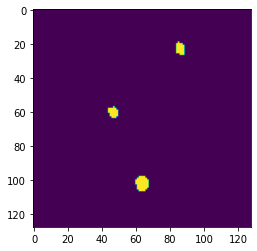

In [7]:
# for n, id_ in tqdm(enumerate(mask_ids), total=len(train_ids)): 

for n, mask_file in tqdm(enumerate(mask_ids), total=len(mask_ids)):

  #print(f'File name: {mask_file}')
  mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

  #print(f'type of mask : {mask.dtype}')
  mask_ = skimage.io.imread(path + 'masks/' + mask_file, plugin='pil')
  #print(f'type of mask_ : {mask_.dtype}')
  mask_ = np.expand_dims(skimage.transform.resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                preserve_range=True), axis=-1)
  print(f'type of mask : {mask_.dtype}')
  #plt.imshow(np.squeeze(mask_))
  mask = np.maximum(mask, mask_)
  #print(f'type of mask : {mask.dtype}')

  #print(mask.max())
   
        
  Y_train[n] = mask.astype('bool')
  
  
print(f'Type of Y_train : {Y_train[0].dtype}')
plt.imshow(np.squeeze(Y_train[0]))



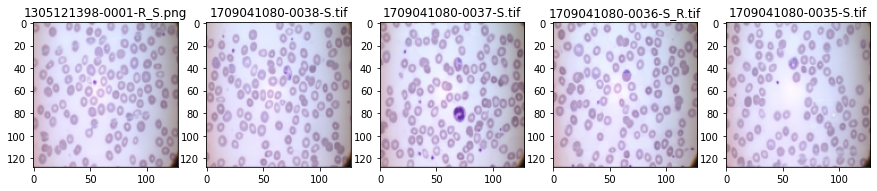

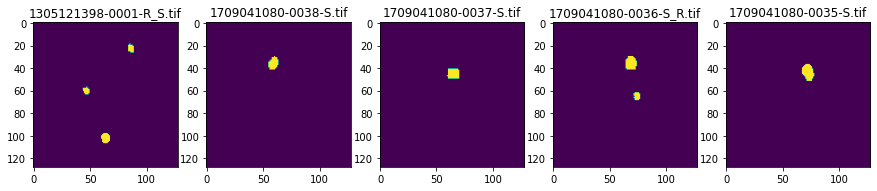

In [8]:
fig,ax = plt.subplots(1,5,figsize=(15,15))

for i, idx in enumerate(X_train[-5:]):
  ax[i].imshow(idx) # [...,[2,1,0]]
  ax[i].title.set_text(str(train_ids[-i]))

fig,ax = plt.subplots(1,5,figsize=(15,15))
for i,idx in enumerate(Y_train[-5:]):
  ax[i].imshow(np.squeeze(Y_train[-i]))
  ax[i].title.set_text(str(mask_ids[-i]))


In [22]:
np.save('/content/drive/MyDrive/Unet_Paludism/images',X_train)
np.save('/content/drive/MyDrive/Unet_Paludism/ground_truth',Y_train)

# Creating Model

In [10]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [11]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Unet_Paludism/Models_and_logs/model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/Unet_Paludism/Models_and_logs/logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

Epoch 1/25
12/12 [==============================] - 28s 2s/step - loss: 0.2263 - accuracy: 0.9759 - val_loss: 0.0482 - val_accuracy: 0.9935
Epoch 2/25
12/12 [==============================] - 25s 2s/step - loss: 0.0900 - accuracy: 0.9849 - val_loss: 0.0455 - val_accuracy: 0.9935
Epoch 3/25
12/12 [==============================] - 24s 2s/step - loss: 0.0856 - accuracy: 0.9843 - val_loss: 0.0438 - val_accuracy: 0.9935
Epoch 4/25
12/12 [==============================] - 24s 2s/step - loss: 0.0734 - accuracy: 0.9868 - val_loss: 0.0429 - val_accuracy: 0.9935
Epoch 5/25
12/12 [==============================] - 24s 2s/step - loss: 0.0768 - accuracy: 0.9856 - val_loss: 0.0408 - val_accuracy: 0.9935
Epoch 6/25
12/12 [==============================] - 24s 2s/step - loss: 0.0845 - accuracy: 0.9835 - val_loss: 0.0403 - val_accuracy: 0.9935
Epoch 7/25
12/12 [==============================] - 24s 2s/step - loss: 0.0749 - accuracy: 0.9856 - val_loss: 0.0394 - val_accuracy: 0.9935
Epoch 8/25
12/12 [==

In [12]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Accuracy", "loss"))

fig.add_trace(
go.Scatter(y = results.history['accuracy'], showlegend = True, name="Accuracy - Training",
                line_color='dimgray', legendgroup = 'Accuracy'),
row=1, col=1)
fig.add_trace(go.Scatter(y = results.history['val_accuracy'], showlegend = True, name="Accuracy - Validation",
                line_color='red', legendgroup = 'Accuracy'))

fig.add_trace(
go.Scatter(y = results.history['loss'], showlegend = True, name="Loss - Training",
                line_color='dimgray', legendgroup = 'Loss'),
row=1, col=2)
fig.add_trace(go.Scatter(y = results.history['val_loss'], showlegend = True, name="Loss - Validation",
                line_color='red', legendgroup = 'Loss'),row=1, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="epochs", row=1, col=1)
fig.update_xaxes(title_text="epochs", row=1, col=2)



fig.update_layout(height=600, width=800, title_text="Model Results", title_x=0.5)

# Generating Masks

In [13]:
TEST_PATH = '/content/drive/MyDrive/Unet_Paludism/test/'
img_test = sorted(os.listdir(TEST_PATH))


Type of img : uint8 
 Size of img : (750, 750, 3)


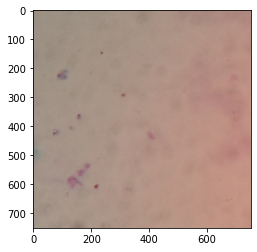

In [14]:
img = skimage.io.imread('/content/drive/MyDrive/Unet_Paludism/test/plasmodium-phone-0008.jpg')
#plt.imshow(skimage.io.imread('/content/drive/MyDrive/Unet_Paludism/test/plasmodium-phone-0008.jpg'))
plt.imshow(img)

print(f'Type of img : {img.dtype} \n Size of img : {img.shape}')

Rescale image shape : (128, 128, 3)


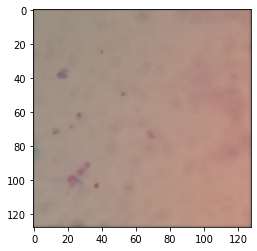

In [15]:
 img_rescale = skimage.transform.resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)

plt.imshow((img_rescale).astype(np.uint8))
print(f'Rescale image shape : {img_rescale.shape}')

In [16]:
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_train_t = (preds_train > 0.5).astype(np.uint8)


6/6 [==============================] - 5s 801ms/step


In [17]:
preds_train.shape

(189, 128, 128, 1)

1/1 [==============================] - 1s 538ms/step


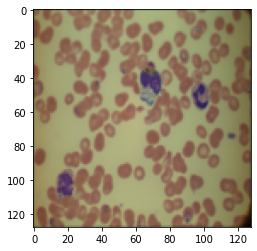

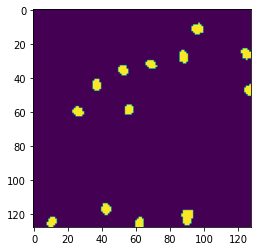

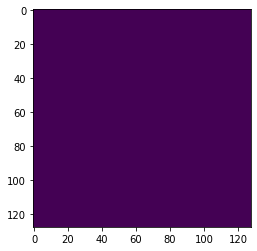

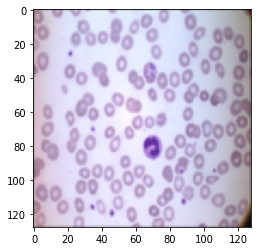

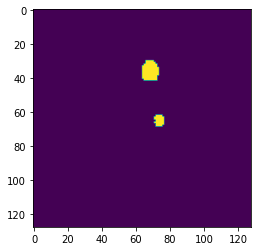

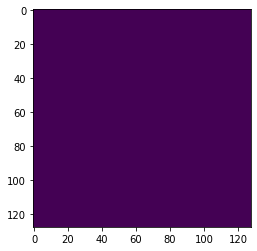

In [18]:
idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
#preds_test = model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
#preds_test_t = (preds_test > 0.5).astype(np.uint8)


# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
plt.imshow(X_train[ix])
plt.show()
plt.imshow(np.squeeze(Y_train[ix]))
plt.show()
plt.imshow(np.squeeze(preds_train_t[ix]))
plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
plt.imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
plt.imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
plt.imshow(np.squeeze(preds_val_t[ix]))
plt.show()

# Testing Model

In [19]:
test_ids = sorted(os.listdir('/content/drive/MyDrive/Unet_Paludism/test/'))

X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
print(f'Shape of test set : {X_test.shape}')

## Fill X_test with images

print('Resizing training images and masks \n')


for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)): 

  path = TEST_PATH # + id_
  img = skimage.io.imread(path + id_)[:,:,:IMG_CHANNELS]  
  img = skimage.transform.resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
  X_test[n] = img  #Fill empty X_train with values from img


  1%|          | 2/379 [00:00<00:29, 12.66it/s]

Shape of test set : (379, 128, 128, 3)
Resizing training images and masks 



100%|██████████| 379/379 [00:38<00:00,  9.77it/s]


In [20]:
Y_test = model.predict(X_test, verbose=1)
preds_test_t = (Y_test > 0.5).astype(np.uint8)


12/12 [==============================] - 10s 814ms/step


325


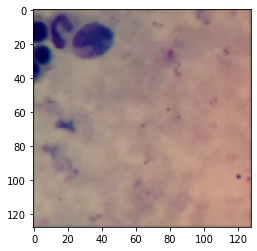

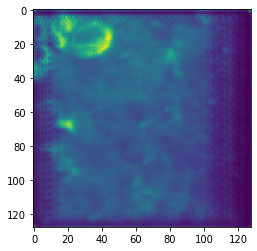

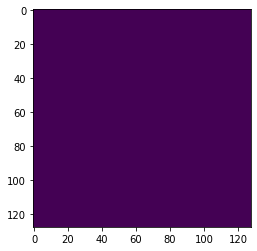

In [21]:
idx = random.randint(0, len(X_test))
print(idx)


plt.imshow(X_test[idx])
plt.show()
plt.imshow(np.squeeze(Y_test[idx]))
plt.show()
plt.imshow(np.squeeze(preds_test_t[idx]))
plt.show()

In [21]:
fig,ax = plt.subplots(1,5,figsize=(15,15))

for i, idx in enumerate(X_train[-5:]):

  ax[i].imshow(idx) # [...,[2,1,0]]
  ax[i].title.set_text(str(train_ids[-i]))

fig,ax = plt.subplots(1,5,figsize=(15,15))

for i,idx in enumerate(Y_train[-5:]):
  
  ax[i].imshow(np.squeeze(Y_train[-i]))
  ax[i].title.set_text(str(mask_ids[-i]))